Using Decision Trees / Logistic Regression to predict the species of a flower

Import the dataset

In [19]:
import pandas as pd

df = pd.read_csv("IRIS.csv")

Dataset analysis:

The dataset contains a set of 150 records under 5 attributes
- Petal Length
- Petal Width
- Sepal Length
- Sepal width
- Class(Species).

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
print("Shape of the dataset " + str(df.shape))

Shape of the dataset (150, 5)


We have an intuition about the dataset now, but we have to dig deeper to use it at full potential.

Let's check if we have duplicates instances

In [23]:
print('Number of duplicate instances: ' + str(df.duplicated().sum()))

Number of duplicate instances: 3


We notice that we have 3 duplicate instances. Solution remove them.

In [24]:
df = df.drop_duplicates()

Check now if we have some null data among the instances.

In [25]:
print('Number of null features: \n' + str(df.isnull().sum()))

Number of null features: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [26]:
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109321      0.871305     0.817058
sepal_width      -0.109321     1.000000     -0.421057    -0.356376
petal_length      0.871305    -0.421057      1.000000     0.961883
petal_width       0.817058    -0.356376      0.961883     1.000000


<Axes: >

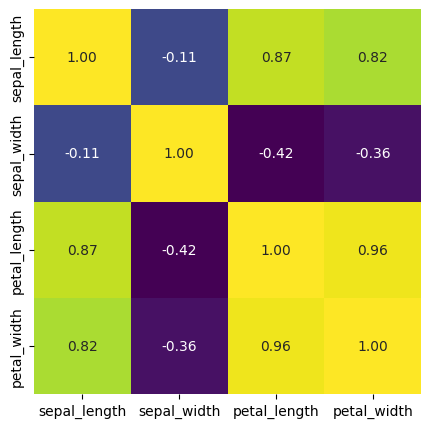

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=None,cmap='viridis')

What about the labels ?

In [28]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df["species"] = labelEncoder.fit_transform(df["species"])

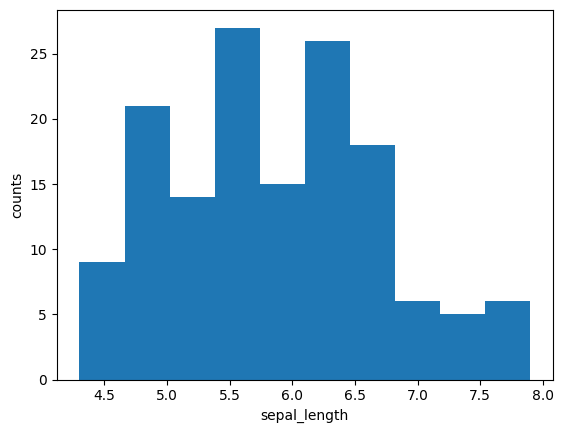

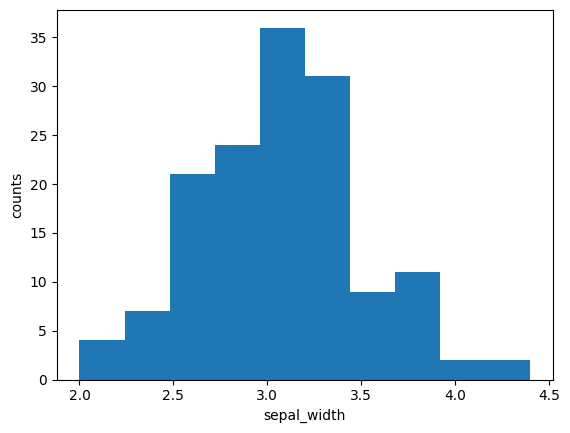

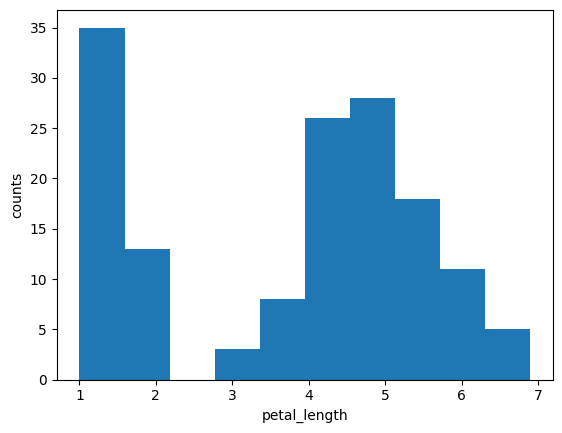

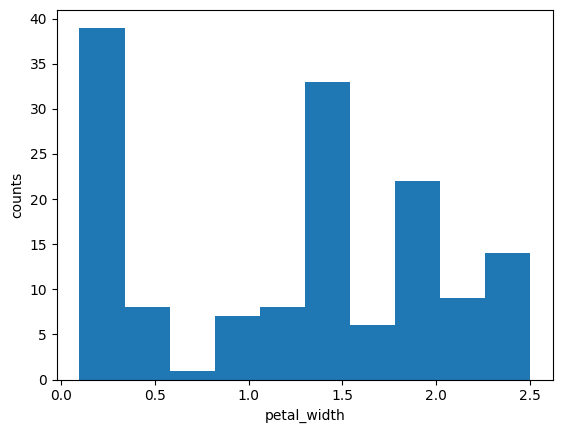

In [30]:
def plotColumnDistribution(df, column):
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('counts')
    plt.show()

plotColumnDistribution(df, 'sepal_length')
plotColumnDistribution(df, 'sepal_width')
plotColumnDistribution(df, 'petal_length')
plotColumnDistribution(df, 'petal_width')

General statistics overview - if the min/max seems extremely far from the mean then outliners exists in the dataset

In [31]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,1.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Building the dataset

In [32]:
X = df.drop('species', axis=1)
y = df['species'].values

Standardize the data to remove outliners while keeping the proportional relationship between them

In [33]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

Logistic Regression Classification

In [35]:
from sklearn.linear_model import LogisticRegression

logisticRegModel = LogisticRegression(random_state=1)
logisticRegModel.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [36]:
predictions = logisticRegModel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  7]])

Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeClassifierModel = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=1
)

# Fit the algorithm to the training data.
decisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=1)

In [40]:
predictions = decisionTreeClassifierModel.predict(X_test)

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [42]:
from sklearn.tree import ExtraTreeClassifier

extraTreeClassifierModel = ExtraTreeClassifier(
    random_state=1
)

# Fit the algorithm to the training data.
extraTreeClassifierModel.fit(X_train, y_train)

ExtraTreeClassifier(random_state=1)

In [43]:
predictions = extraTreeClassifierModel.predict(X_test)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      1.00      0.96        13
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [45]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifierModel = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=1
)

# Fit the algorithm to the training data.
randomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [46]:
predictions = randomForestClassifierModel.predict(X_test)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [48]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier model
gausianNaiveBayesClassifierModel = GaussianNB()

# Fit the algorithm to the training data.
gausianNaiveBayesClassifierModel.fit(X_train, y_train)

predictions = gausianNaiveBayesClassifierModel.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.85      0.88        13
           2       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [51]:
from sklearn.naive_bayes import MultinomialNB

# Check for negative values in X_train and X_test
if np.any(X_train < 0) or np.any(X_test < 0):
    # Transform the data to make all values non-negative
    X_train = np.abs(X_train)
    X_test = np.abs(X_test)

# Create a Naive Bayes classifier model
multinomialNaiveBayesClassifierModel = MultinomialNB()

# Fit the algorithm to the training data.
multinomialNaiveBayesClassifierModel.fit(X_train, y_train)

predictions = multinomialNaiveBayesClassifierModel.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.50      0.38      0.43        13
           2       0.36      0.62      0.45         8

    accuracy                           0.47        30
   macro avg       0.51      0.48      0.47        30
weighted avg       0.51      0.47      0.47        30



In [59]:
from sklearn.naive_bayes import ComplementNB

# Create a Naive Bayes classifier model
complementNaiveBayesClassifierModel = ComplementNB()

# Fit the algorithm to the training data.
complementNaiveBayesClassifierModel.fit(X_train, y_train)

predictions = complementNaiveBayesClassifierModel.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.44      0.54      0.48        13
           2       0.50      0.62      0.56         8

    accuracy                           0.47        30
   macro avg       0.48      0.46      0.45        30
weighted avg       0.47      0.47      0.45        30



In [60]:
from sklearn.naive_bayes import BernoulliNB

# Create a Naive Bayes classifier model
bernoulliNaiveBayesClassifierModel = BernoulliNB()

# Fit the algorithm to the training data.
bernoulliNaiveBayesClassifierModel.fit(X_train, y_train)

predictions = bernoulliNaiveBayesClassifierModel.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        13
           2       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



d:\scoala\lab_ml\lab3\bayes_venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\scoala\lab_ml\lab3\bayes_venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\scoala\lab_ml\lab3\bayes_venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
from sklearn.naive_bayes import CategoricalNB

# Create a Naive Bayes classifier model
categoricalNaiveBayesClassifierModel = CategoricalNB()

# Fit the algorithm to the training data.
categoricalNaiveBayesClassifierModel.fit(X_train, y_train)

predictions = categoricalNaiveBayesClassifierModel.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.81      1.00      0.90        13
           2       1.00      0.38      0.55         8

    accuracy                           0.83        30
   macro avg       0.88      0.79      0.78        30
weighted avg       0.86      0.83      0.80        30

